#**Libraries**

In [1]:
# Basic
from time import time
import logging
import matplotlib.pyplot as plt
import joblib
import numpy as np
import warnings
import random

# Load data 
from sklearn.datasets import fetch_lfw_people

# Machine learning: basic  
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline

# Machine learning: dimension reduction  
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Machine learning: classification 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Perfomance metrics 
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, classification_report

In [2]:
warnings.filterwarnings("ignore")

#**Load data**

In [3]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [4]:
n_samples, h, w = lfw_people.images.shape

print(n_samples, h, w)

1288 50 37


In [5]:
X = lfw_people.data/255
n_features = X.shape[1]

print(X.shape)


(1288, 1850)


In [6]:
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print(n_classes)

7


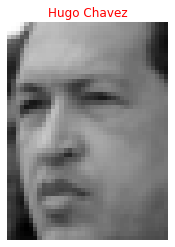

In [7]:
plt.imshow(np.array(X[0,:]).reshape(h, w),cmap='gray')
plt.title(target_names[y[0]], fontsize=12, c='r')
plt.axis('off')
plt.show()

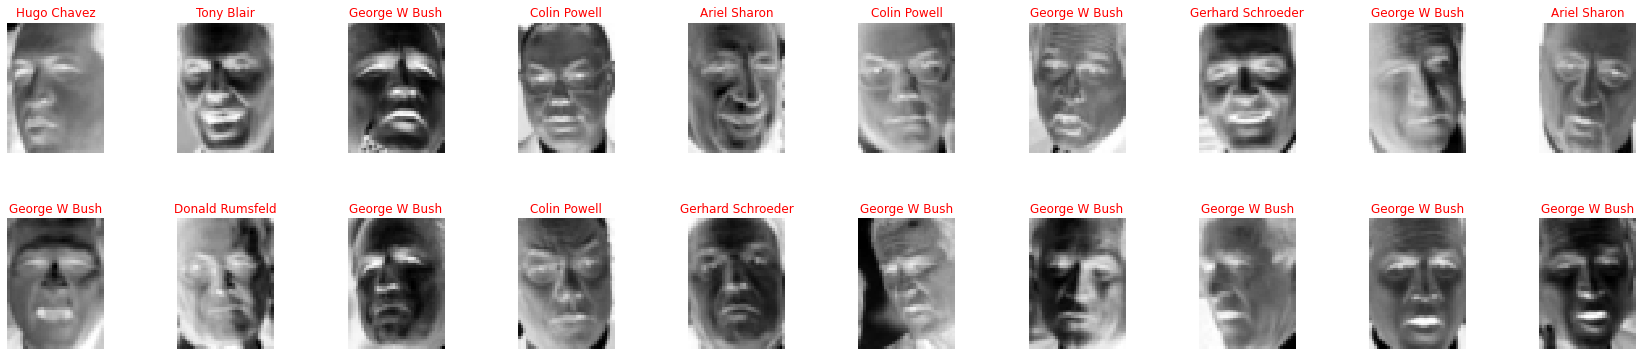

In [8]:
n_rows = 2
n_cols = 10
plt.figure(figsize=(n_cols*3, n_rows*3))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X[index].reshape(h, w), cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(target_names[y[index]], fontsize=12, c='r')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#**Exploratory data analysis**

In [9]:
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X)

X_PCA.shape


(1288, 2)

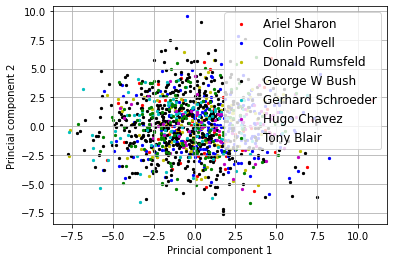

In [10]:
colors = ['r', 'b', 'y', 'k', 'c', 'm', 'g']

for l, c in zip(np.unique(y), colors):
  plt.scatter(X_PCA[y==l, 0], X_PCA[y==l, 1], c=c, label=target_names[l], s=5)

plt.xlabel('Princial component 1')
plt.ylabel('Princial component 2')
plt.legend(prop={'size': 12})
plt.grid()
plt.show()

In [11]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X)

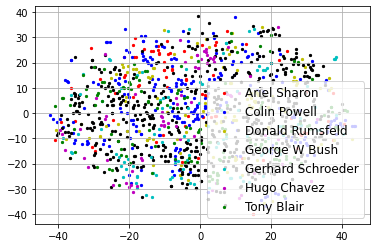

In [12]:
for l, c in zip(np.unique(y), colors):
  plt.scatter(X_tsne[y==l, 0], X_tsne[y==l, 1], c=c, label=target_names[l], s=5)
plt.legend(prop={'size': 12})
plt.grid()
plt.show()

In [13]:
unique, counts = np.unique(y, return_counts=True)

print(unique, counts)

[0 1 2 3 4 5 6] [ 77 236 121 530 109  71 144]


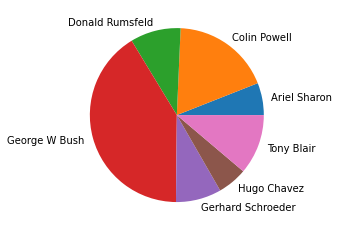

In [14]:
plt.pie(counts, labels=target_names)
plt.show()

#**Pre-processing**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1030, 1850), (258, 1850), (1030,), (258,))

#**Machine Learning**

1. Models 
2. Tuning parameters 
3. Training

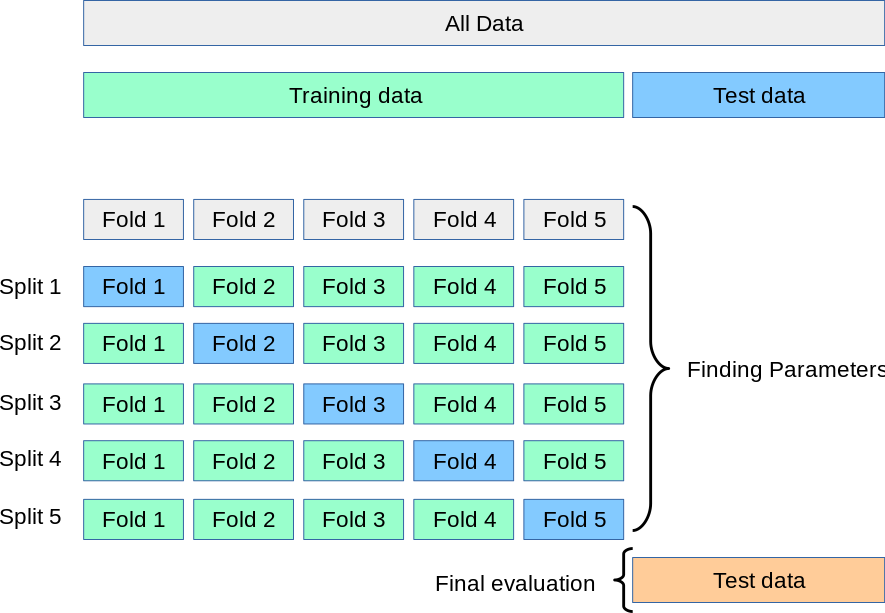

In [16]:
steps=[
       [('rep',  PCA()),
        ('cla', LogisticRegression())],
       
       [('rep',  PCA()),
        ('cla', SGDClassifier())],
       
       [('cla', SVC())]
      ]

parameters = [
              {'rep__n_components' : [0.8, 0.9],              
              'cla__C': [0.5, 1]},

              {'rep__n_components' : [0.8, 0.9],              
               'cla__alpha': [0.0001, 0.001]},
              
              {'cla__C': [1e3, 5e3, 1e4, 5e4, 1e5],
               'cla__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}
             ]

label_models = ['PCA_Logistic','PCA_SGD', 'PCA_QuadraticDA', 'SVCrbf']

In [17]:
best_model = []
filename = ''
for i in range(len(steps)):
    
    print('modelo %d/%d' % (i+1,len(steps)))

    grid_search = GridSearchCV(Pipeline(steps[i]),
                               parameters[i],
                               n_jobs=-1,
                               cv=5,
                               scoring='balanced_accuracy',
                               verbose=10)

    grid_search.fit(X_train, y_train)

    #mejor modelo entrenado
    best_model += [grid_search.best_estimator_]
    joblib.dump(best_model,filename+".pkl")

print('Mejores modelos:\n')
best_model

modelo 1/3
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.2s finished


modelo 2/3
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.9s finished


modelo 3/3
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  2

Mejores modelos:



[Pipeline(memory=None,
          steps=[('rep',
                  PCA(copy=True, iterated_power='auto', n_components=0.9,
                      random_state=None, svd_solver='auto', tol=0.0,
                      whiten=False)),
                 ('cla',
                  LogisticRegression(C=1, class_weight=None, dual=False,
                                     fit_intercept=True, intercept_scaling=1,
                                     l1_ratio=None, max_iter=100,
                                     multi_class='auto', n_jobs=None,
                                     penalty='l2', random_state=None,
                                     solver='lbfgs', tol=0.0001, verbose=0,
                                     warm_start=False))],
          verbose=False), Pipeline(memory=None,
          steps=[('rep',
                  PCA(copy=True, iterated_power='auto', n_components=0.9,
                      random_state=None, svd_solver='auto', tol=0.0,
                      whiten=False)),
 

#**Performace metrics**

Evaluando modelo 1/3


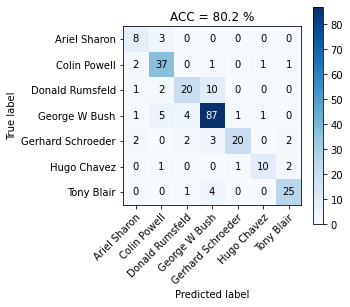

                   precision    recall  f1-score   support

     Ariel Sharon       0.57      0.73      0.64        11
     Colin Powell       0.77      0.88      0.82        42
  Donald Rumsfeld       0.74      0.61      0.67        33
    George W Bush       0.83      0.88      0.85        99
Gerhard Schroeder       0.91      0.69      0.78        29
      Hugo Chavez       0.83      0.71      0.77        14
       Tony Blair       0.83      0.83      0.83        30

         accuracy                           0.80       258
        macro avg       0.78      0.76      0.77       258
     weighted avg       0.81      0.80      0.80       258

Evaluando modelo 2/3


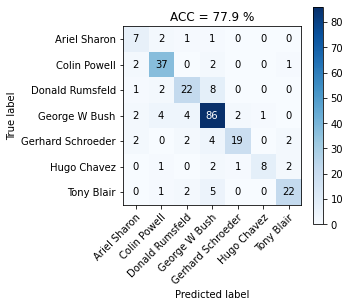

                   precision    recall  f1-score   support

     Ariel Sharon       0.50      0.64      0.56        11
     Colin Powell       0.79      0.88      0.83        42
  Donald Rumsfeld       0.71      0.67      0.69        33
    George W Bush       0.80      0.87      0.83        99
Gerhard Schroeder       0.86      0.66      0.75        29
      Hugo Chavez       0.89      0.57      0.70        14
       Tony Blair       0.81      0.73      0.77        30

         accuracy                           0.78       258
        macro avg       0.77      0.72      0.73       258
     weighted avg       0.79      0.78      0.78       258

Evaluando modelo 3/3


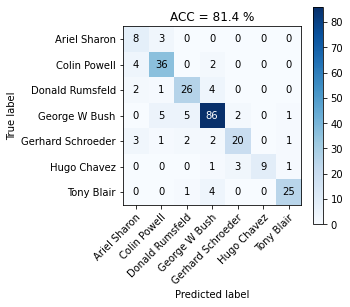

                   precision    recall  f1-score   support

     Ariel Sharon       0.47      0.73      0.57        11
     Colin Powell       0.78      0.86      0.82        42
  Donald Rumsfeld       0.76      0.79      0.78        33
    George W Bush       0.87      0.87      0.87        99
Gerhard Schroeder       0.80      0.69      0.74        29
      Hugo Chavez       1.00      0.64      0.78        14
       Tony Blair       0.89      0.83      0.86        30

         accuracy                           0.81       258
        macro avg       0.80      0.77      0.77       258
     weighted avg       0.83      0.81      0.82       258



In [18]:
my_model_loaded = joblib.load(filename+".pkl")
path_img = ''

for i in range(len(my_model_loaded)):
    print('Evaluando modelo %d/%d' % (i+1,len(my_model_loaded)))

    y_pred = my_model_loaded[i].predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plotter confusion matriz 
    fig, ax = plt.subplots(figsize=(4,4))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
           xticklabels=target_names, yticklabels=target_names,
           title='ACC = %.1f %%' % (100*acc),
           ylabel='True label',
           xlabel='Predicted label')
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
            
    plt.show()

    # Imprimir resultados 
    cr = classification_report(y_test, y_pred, 
                               labels=range(target_names.shape[0]),
                               target_names=target_names
                               )                          
    
    print(cr)

